# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Risma Faoziya
- **Email:** rismafaoziya@gmail.com
- **ID Dicoding:** faoziyarisma

## Menentukan Pertanyaan Bisnis



*   Pertanyaan 1: Musim (season) manakah yang mencatat jumlah penyewaan (rental) tertinggi->terendah?
*   Pertanyaan 2: Bagaimana pola distribusi jumlah penyewaan pada setiap bulan, serta pada musim apa terjadi peningkatan dan penurunan jumlah rental?
*   Pertanyaan 3: Pada hari apa (weekday) jumlah penyewaan sepeda paling banyak-sedikit terjadi?
*   Pertanyaan 4: Pada kondisi cuaca (weather situation) apa jumlah penyewaan paling tinggi dan paling rendah tercatat?
*   Pertanyaan 5: Pada jam berapa waktu yang paling diminati untuk menyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
url_day_csv_direct = 'https://drive.google.com/uc?export=download&id=1QBd8yBVOsr0NieTvp30vq37xqqOS-j-i'
url_hour_csv_direct = 'https://drive.google.com/uc?export=download&id=1QtH7ku_KkED4dpUn1roQQ_lcKzysHKau'

day_df = pd.read_csv(url_day_csv_direct)
hour_df = pd.read_csv(url_hour_csv_direct)

print("Day DataFrame Head:")
display(day_df.head())
print("\nHour DataFrame Head:")
display(hour_df.head())

Day DataFrame Head:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Hour DataFrame Head:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dalam data bike sharing dataset terdapat 2 data utama yaitu day.csv dan hour.csv dimana keduanya memiliki kolom yang sama namun terdapat kolom pembeda yaitu hr (hour) pada data hour.csv.
- Data pada bike sharing dataset berisi data penyewa sepeda baik penyewa yang terdaftar atau casual dimana pencatatannya memiliki detail per hari (day.csv) atau per jam (hour.csv)

### Assessing Data

#### Checking Null Values

In [3]:
# day data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan info diatas pada day.csv tidak memiliki null values.

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan info diatas pada hour.csv tidak memiliki null values.

#### Check Duplicates Values

In [5]:
day_df.duplicated().sum()

np.int64(0)

Berdasarkan info diatas pada day.csv tidak memiliki data duplikat.

In [6]:
hour_df.duplicated().sum()

np.int64(0)

Berdasarkan info diatas pada hour.csv tidak memiliki data duplikat.

#### Check Distribution Data on Numeric Columns

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Terlihat pada tabel diatas kolom casual memiliki outlier dimana kolom casual memiliki mean = 713, dan memiliki max values = 3410, sehingga kita perlu melakukan normalisasi nilai-nilai outlier tersebut.

In [8]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Terlihat pada tabel diatas kolom casual tidak memiliki outlier namun untuk registered dan count terlihat memiliki outlier namun tidak terlalu jauh sehingga saya tidak menormalisasi nilai outliernya.

### Cleaning Data

#### Menangani Outlier pada Kolom 'casual'

Kolom 'casual' setelah capping:


,casual
count,731.000000
mean,824.388509
std,623.642956
min,2.000000
25%,315.500000
50%,713.000000
75%,1096.000000
max,2266.750000


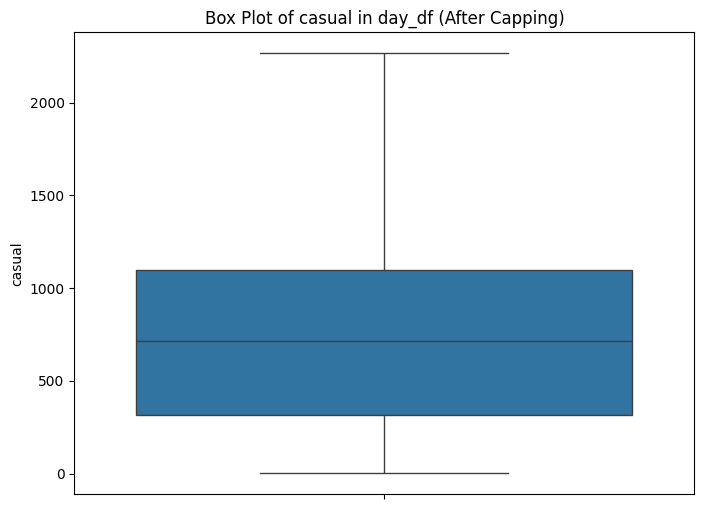

In [9]:
# Hitung IQR untuk kolom 'casual'
Q1 = day_df['casual'].quantile(0.25)
Q3 = day_df['casual'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lakukan capping pada kolom 'casual'
# Pastikan lower_bound tidak di bawah 0 karena jumlah casual tidak mungkin negatif
day_df['casual'] = np.where(day_df['casual'] < max(0, lower_bound), max(0, lower_bound), day_df['casual'])
day_df['casual'] = np.where(day_df['casual'] > upper_bound, upper_bound, day_df['casual'])

print("Kolom 'casual' setelah capping:")
display(day_df[['casual']].describe())

# Visualisasikan kembali box plot untuk 'casual' setelah capping
plt.figure(figsize=(8, 6))
sns.boxplot(y=day_df['casual'])
plt.title('Box Plot of casual in day_df (After Capping)')
plt.ylabel('casual')
plt.show()

**Insight:**
Terlihat sekarang kolom casual sudah tidak memiliki outlier.

#### Convert kolom dteday menjadi datetime datatype

In [10]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    float64       
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

Saya ingin mengetahui apakah data day_df merupakan summary dari hour_df.

In [13]:
# apakah rentang tanggal (awal-akhir) antara day_df dan hour_df sama?
sum_hour_df = hour_df.dteday.value_counts().reset_index()
sum_hour_df = sum_hour_df.sort_values(by='dteday',ascending=True)
sum_hour_df

,dteday,count
1,2011-01-01,24
699,2011-01-02,23
719,2011-01-03,22
668,2011-01-04,23
667,2011-01-05,23
...,...,...
5,2012-12-27,24
4,2012-12-28,24
3,2012-12-29,24
2,2012-12-30,24


Terlihat pada hour_df data dimulai pada tanggal 2011-01-01 sampai 2012-12-31 dan berjumlah 731 rows.

In [14]:
day_df['dteday'].sort_values(ascending=True)

,dteday
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05
...,...
726,2012-12-27
727,2012-12-28
728,2012-12-29
729,2012-12-30


Terlihat pada day_df data juga dimulai pada tanggal 2011-01-01 sampai 2012-12-31 dan berjumlah 731 rows.

In [15]:
# Konversi kolom 'dteday' ke tipe datetime jika belum
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Ambil tanggal awal dan akhir
start_date = day_df['dteday'].min()
end_date = day_df['dteday'].max()

# Hitung selisih hari
date_difference = (end_date - start_date).days + 1

print(f"Selisih hari antara {start_date.strftime('%Y-%m-%d')} dan {end_date.strftime('%Y-%m-%d')} adalah {date_difference} hari.")

Selisih hari antara 2011-01-01 dan 2012-12-31 adalah 731 hari.


In [16]:
# apakah jumlah cnt sama antara day_df dan hour_df
sum_cnt_day_df = day_df.cnt.sum()
sum_cnt_hour_df = hour_df.cnt.sum()
print(f"Jumlah cnt pada day_df: {sum_cnt_day_df}")
print(f"Jumlah cnt pada hour_df: {sum_cnt_hour_df}")

Jumlah cnt pada day_df: 3292679
Jumlah cnt pada hour_df: 3292679


Terlihat pada hour_df data dimulai pada tanggal 2011-01-01 sampai 2012-12-31 dan berjumlah 731 rows dan memiliki jumlah data penyewa yang sama yaitu 3292679 penyewa. Karena pada hour_df terdapat data jam yang lebih detail saya ingin mem-processsing data hour_df.

Karena pada pertanyaan terdapat pertanyaan periode bulan-tahun, saya akan menambahkan kolom month-year untuk mengcluster data berdasarkan bulan-tahun.

In [17]:
hour_df['month_year'] = hour_df['dteday'].dt.to_period('M')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Dan bila dianalisa dalam 1 bulan bisa jadi memiliki beberapa season, untuk kita perlu membulatkan musim yang menjadi modus di periode bulan-tahun tersebut. Untuk itu saya menambahkan kolom season.

In [18]:
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
hour_df['season_name'] = hour_df['season'].map(season_mapping)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month_year,season_name
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01,Spring
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01,Spring
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01,Spring
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01,Spring
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01,Spring


#### Pertanyaan 1 : Musim (season) manakah yang mencatat jumlah penyewaan (rental) tertinggi->terendah?

In [19]:
season_rentals = hour_df.groupby('season_name')['cnt'].sum().reset_index().sort_values(by='cnt', ascending=False)
season_rentals

,season_name,cnt
0,Fall,1061129
2,Summer,918589
3,Winter,841613
1,Spring,471348


Terlihat bahwa urutan season dengan jumlah penyewaan tertinggi ke rendah yaitu Fall, Summer, Winter, Spring.

#### Pertanyaan 2 : Bagaimana pola distribusi jumlah penyewaan pada setiap bulan, serta pada musim apa terjadi peningkatan dan penurunan jumlah rental?

In [20]:
monthly_hour_df = hour_df.groupby('month_year')['cnt'].sum().reset_index()
monthly_hour_df

,month_year,cnt
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821
5,2011-06,143512
6,2011-07,141341
7,2011-08,136691
8,2011-09,127418
9,2011-10,123511


In [21]:
monthly_hour_df_sort_desc = monthly_hour_df.sort_values(by='cnt', ascending=False)
monthly_hour_df_sort_desc.head(10)

,month_year,cnt
20,2012-09,218573
19,2012-08,214503
18,2012-07,203607
17,2012-06,202830
21,2012-10,198841
16,2012-05,195865
15,2012-04,174224
14,2012-03,164875
22,2012-11,152664
5,2011-06,143512


Terlihat 10 periode bulan-tahun dengan jumlah rental terbanyak namun kita ingin melihat distribusi penaikan dan penurunan penyewaan sepeda dan pada season apa untuk itu kita perlu data tambahan untuk menentukan season di periode bulan-tahun itu.

Untuk menambahkan detail season pada plot periode bulan-tahun kita buat dataframe yang berisi periode bulan-tahun dan modus season di periode bulan-tahun itu.

In [22]:
dominant_season_per_month = hour_df.groupby(['month_year', 'season_name']).size().reset_index(name='count')
dominant_season_per_month_df = dominant_season_per_month.loc[dominant_season_per_month.groupby('month_year')['count'].idxmax()].reset_index(drop=True)
dominant_season_per_month_df = dominant_season_per_month_df[['month_year', 'season_name']]
print(dominant_season_per_month_df)

   month_year season_name
0     2011-01      Spring
1     2011-02      Spring
2     2011-03      Spring
3     2011-04      Summer
4     2011-05      Summer
5     2011-06      Summer
6     2011-07        Fall
7     2011-08        Fall
8     2011-09        Fall
9     2011-10      Winter
10    2011-11      Winter
11    2011-12      Winter
12    2012-01      Spring
13    2012-02      Spring
14    2012-03      Spring
15    2012-04      Summer
16    2012-05      Summer
17    2012-06      Summer
18    2012-07        Fall
19    2012-08        Fall
20    2012-09        Fall
21    2012-10      Winter
22    2012-11      Winter
23    2012-12      Winter


Setelah didapat modus season di periode bulan-tahun selanjutnya kita merge data monthly_hour_df dan dominant_season_per_month_df.

In [23]:
monthly_rentals_with_season = pd.merge(monthly_hour_df, dominant_season_per_month_df, on='month_year', how='left')
monthly_rentals_with_season.head()

,month_year,cnt,season_name
0,2011-01,38189,Spring
1,2011-02,48215,Spring
2,2011-03,64045,Spring
3,2011-04,94870,Summer
4,2011-05,135821,Summer


#### Pertanyaan 3: Pada hari apa (weekday) jumlah penyewaan sepeda paling banyak-sedikit terjadi?

In [24]:
weekday_rentals = hour_df.groupby('weekday')['cnt'].sum().reset_index().sort_values(by='cnt', ascending=False)
weekday_rentals

,weekday,cnt
5,5,487790
4,4,485395
6,6,477807
3,3,473048
2,2,469109
1,1,455503
0,0,444027


Terlihat bahwa pada weekday 5 memilki jumlah penyewa terbanyak yaitu 487790 dan pada weekday 0 (weekend) memiliki jumlah penyewa paling sedikit yaitu 444027.


Pertanyaan 4: Pada kondisi cuaca (weather situation) apa jumlah penyewaan paling tinggi dan paling rendah tercatat?

In [25]:
weathersit_rentals = hour_df.groupby('weathersit')['cnt'].sum().reset_index().sort_values(by='cnt', ascending=False)
weathersit_rentals

,weathersit,cnt
0,1,2338173
1,2,795952
2,3,158331
3,4,223


Terlihat bahwa pada weathersit 1 memilki jumlah penyewa terbanyak yaitu 2338173 dan pada weathersit 4 memiliki jumlah penyewa paling sedikit yaitu 223.

Pertanyaan 5: Pada jam berapa waktu yang paling diminati untuk menyewa sepeda?

In [26]:
hr_rentals = hour_df.groupby('hr')['cnt'].sum().reset_index().sort_values(by='cnt', ascending=False)
hr_rentals.head(5)

,hr,cnt
17,17,336860
18,18,309772
8,8,261001
16,16,227748
19,19,226789


Dari data tercatat bahwa waktu yang paling digemari oleh penyewa yaitu saat cuaca tidak terlalu panas yaitu pada pagi hari (jam 8) dan sore-malam hari (jam 16-19).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/tmp/ipython-input-2698650972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='cnt', data=season_rentals, palette='viridis')


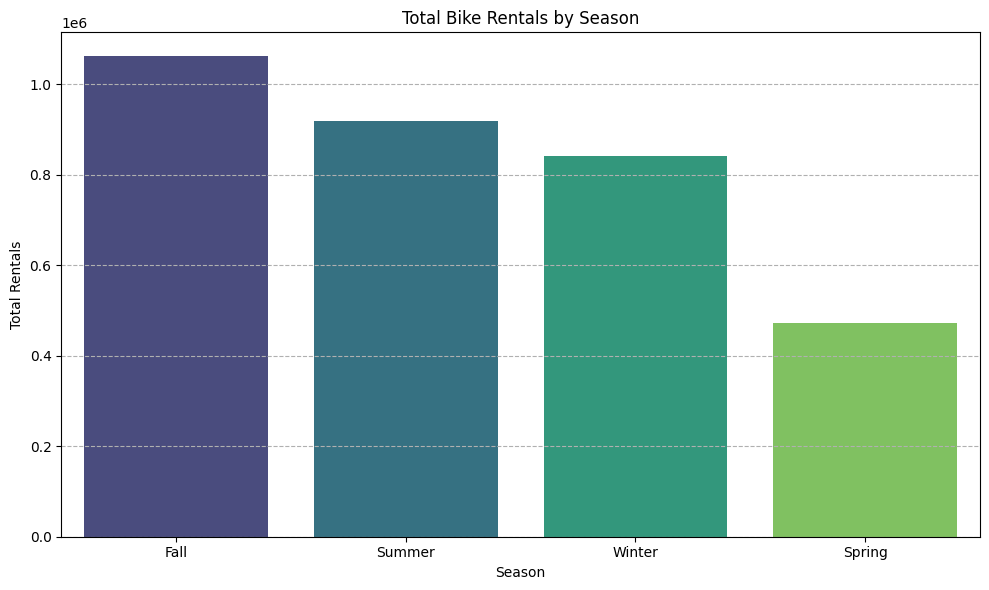

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season_name', y='cnt', data=season_rentals, palette='viridis')
plt.title('Total Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Insight: Urutan season (musim) dengan jumlah rental terbanyak sampai yang paling sedikit yaitu : Fall - Summer - Winter - Spring.

### Pertanyaan 2:

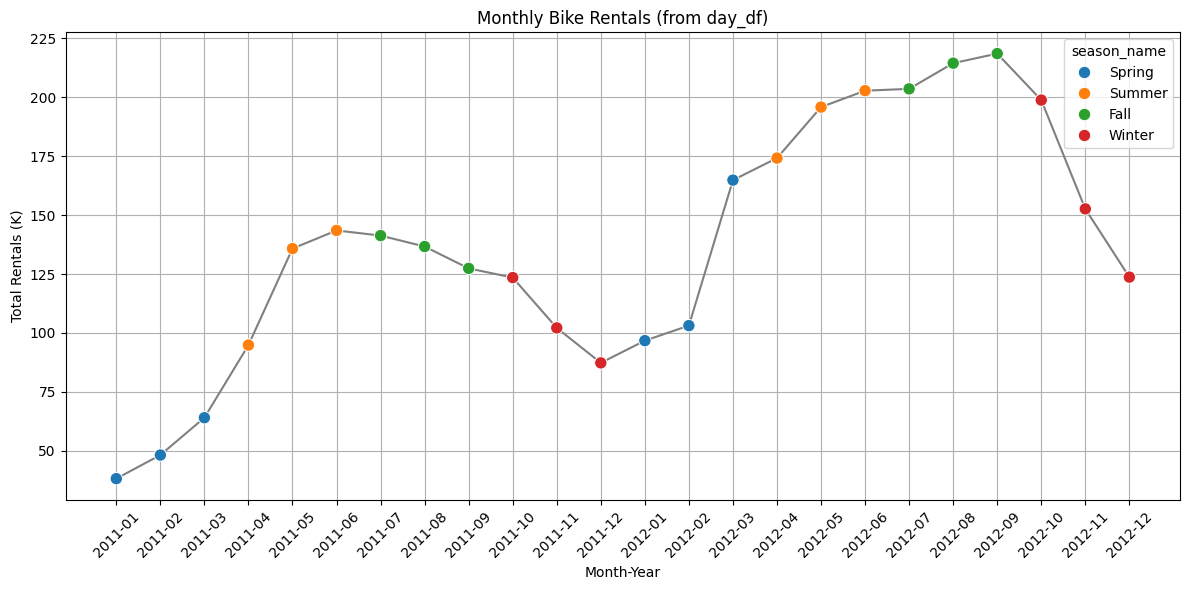

In [28]:
plt.figure(figsize=(12, 6))

# Plot the overall trend line in grey, without individual markers
sns.lineplot(
    x=monthly_rentals_with_season['month_year'].astype(str),
    y=monthly_rentals_with_season['cnt']/1000,
    color='grey', # Set the line color to grey
    marker=None, # No markers for this line plot
    legend=False, # Don't show a legend entry for the grey line
    ax=plt.gca() # Plot on the current axes
)

# Plot the markers, colored by season
sns.scatterplot(
    x=monthly_rentals_with_season['month_year'].astype(str),
    y=monthly_rentals_with_season['cnt']/1000,
    hue=monthly_rentals_with_season['season_name'], # Color points by season
    marker='o', # Set marker style to 'o'
    s=80, # Increase marker size for better visibility
    zorder=2, # Ensure points are drawn on top of the line
    ax=plt.gca() # Plot on the current axes
)

plt.title('Monthly Bike Rentals (from day_df)')
plt.xlabel('Month-Year')
plt.ylabel('Total Rentals (K)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:**
- Terlihat bahwa apabila musim summer dan Fall jumlah penyewa mengalami peningkatan.
- Terlihat bahwa apabila musim winter jumlah penyewa mulai mengalami penurunan.

## Analisis Lanjutan (Opsional)

### Pertanyaan 3

/tmp/ipython-input-4169175688.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=weekday_rentals, palette='viridis', order=weekday_rentals['weekday'])


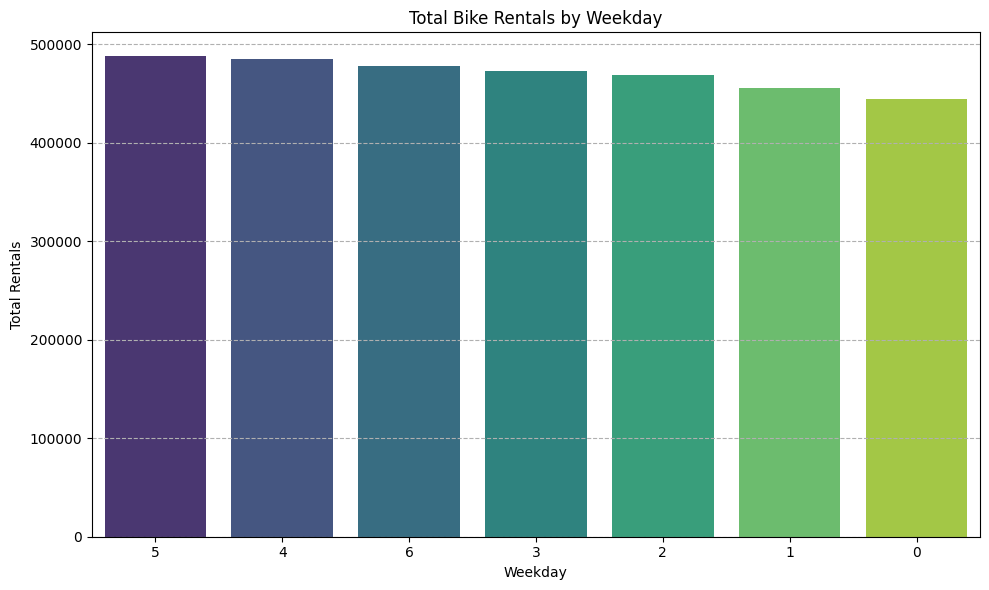

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=weekday_rentals, palette='viridis', order=weekday_rentals['weekday'])
plt.title('Total Bike Rentals by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Rentals')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Terlihat pada grafik weekday yang paling digemari untuk bersepeda yaitu weekday 5 dan weekend paling sedikit orang yang menyewa sepeda.

### Pertanyaan 4

/tmp/ipython-input-1411541083.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='weathersit', y='cnt', data=weathersit_rentals, palette='viridis')


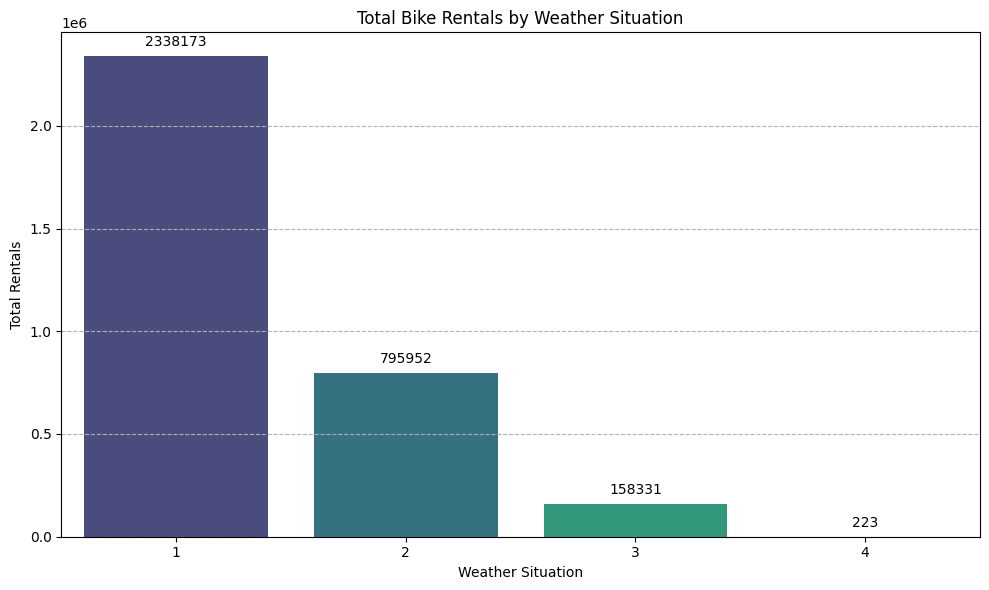

In [30]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='weathersit', y='cnt', data=weathersit_rentals, palette='viridis')
plt.title('Total Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['1', '2', '3', '4'])
plt.grid(axis='y', linestyle='--')

# Add count labels above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

Terlihat bahwa pada weathersit 1 memilki jumlah penyewa terbanyak yaitu 2338173 dan pada weathersit 4 memiliki jumlah penyewa paling sedikit yaitu 223. Berdasarkan data weather 1 yaitu memiliki cuaca Clear, Few clouds, Partly cloudy, Partly cloudy (Cerah, Sedikit awan, Sebagian berawan, Sebagian berawan) dan weather 4 memiliki cuaca Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Embun). Karena cuaca yang enak bersepeda pada weather 1 sehingga banyak penyewa yang menyewa sepeda pada cuaca Cerah, Sedikit awan, Sebagian berawan, Sebagian berawan, sebaliknya pada weather 4 yaitu Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Embun dimana cuaca tersebut ekstrem untuk bersepeda sehingga sedikit penyewa yang menyewa sepeda.

### Pertanyaan 5

/tmp/ipython-input-1431170784.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt', data=hr_rentals.head(), palette='viridis')


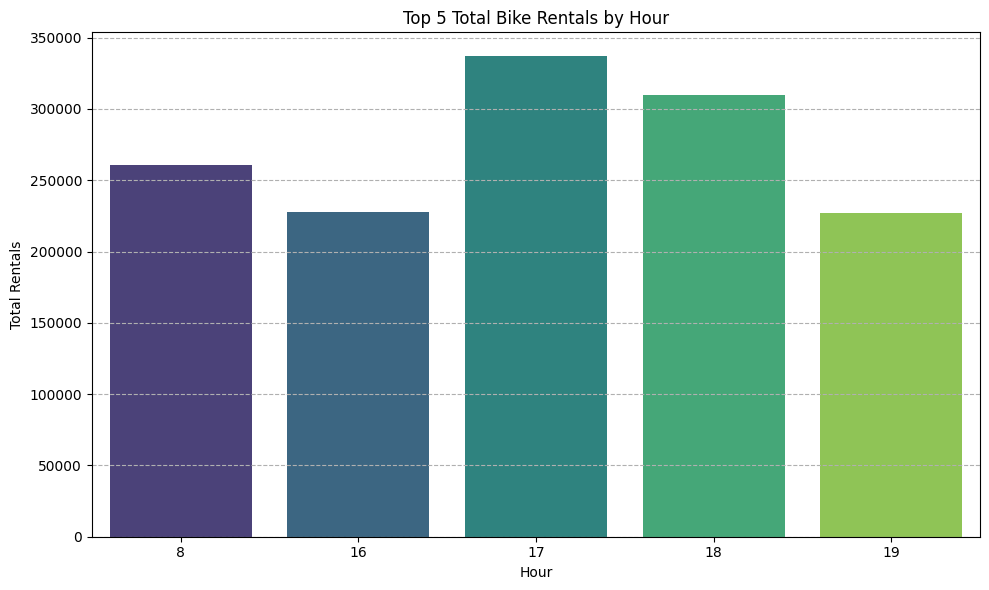

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hr', y='cnt', data=hr_rentals.head(), palette='viridis')
plt.title('Top 5 Total Bike Rentals by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Rentals')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Terlihat bahwa jam yang paling digemari untuk bersepeda dimana orang yang paling sering mneyewa sepeda pada jam 8, 16, 17, 18, dan 19 (dimana pada jam tersebut matahari tidak terlalu terik).

## Conclusion

- Conclution pertanyaan 1 : Musim yang paling digemari orang menyewa sepeda yaitu musim Fall dan Summer dan musim yang paling sedikit orang menyewa sepeda yaitu musim winter dan spring.
- Conclution pertanyaan 2 : Tercatat bahwa pada musim summer dan fall mengalami kenaikan permintaan sewa sehingga lebih baik pada musim tersebut jumlah sepeda dinaikkan untuk menyesuaikan permintaan customer.
- Conclution pertanyaan 3 : Tercatat bahwa pada masa weekday permintaan sewa sepeda mengalami kenaikan dan pada masa weekend orang-orang menghabiskan waktu untuk weekend sehingga permintaan sewa sepeda menurun pada masa itu.
- Conclution pertanyaan 4 : Weathersit 1 memiliki jumlah penyewa tertinggi karena kondisi cuaca yang mendukung aktivitas bersepeda, seperti cerah dan sebagian berawan. Sebaliknya, weathersit 4 memiliki jumlah penyewa terendah karena kondisi cuaca ekstrem, seperti hujan lebat, badai, salju, dan kabut, yang tidak ideal untuk bersepeda.
- Conclution pertanyaan 5 : Waktu yang paling diminati untuk bersepeda adalah pada pukul 08.00 serta 16.00–19.00, karena pada jam-jam tersebut kondisi cuaca cenderung lebih nyaman dan tidak terlalu terik, sehingga mendorong lebih banyak orang untuk menyewa sepeda.


In [33]:
hour_df.to_csv('main_hour_df.csv', index=False)